# Problem Set 4 - Liam Seper

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import scipy.stats as stats
import scipy.special as sp
import math

REG_ROUND = 4
SPEC_ROUND = 6

### 1.)

#### a.)

In [2]:
df = pd.read_csv('SpyAggRates.csv')
print(f"Monthly rates present: {df.shape[0]}")

print("First five months:")
print(df.head())
print("Last five months:")
print(df.tail())

Monthly rates present: 179
First five months:
        Dates       SPY       AGG
0  2003-10-31  0.053527 -0.009348
1  2003-11-30  0.010921  0.003346
2  2003-12-31  0.050327  0.009793
3  2004-01-31  0.019770  0.004405
4  2004-02-29  0.013571  0.011411
Last five months:
          Dates       SPY       AGG
174  2018-04-30  0.005168 -0.009405
175  2018-05-31  0.024309  0.006621
176  2018-06-30  0.005757  0.001032
177  2018-07-31  0.037047 -0.000290
178  2018-08-31  0.031920  0.005683


#### b.)

In [3]:
noDates = df.drop(columns = ['Dates']).rename(columns = {'SPY' : 'X', 'AGG': 'Y'})
print(f'Months included: {noDates.shape[0]}')

Months included: 179


#### c.)

In [4]:
def computeMean(arr):
    return sum(arr) / arr.shape[0]

xMean = computeMean(noDates['X'])
yMean = computeMean(noDates['Y'])
xyMean = computeMean(noDates['X'] * noDates['Y'])
xSqMean = computeMean(noDates['X'] ** 2)
ySqMean = computeMean(noDates['Y'] ** 2)
print(f"mu X = {round(xMean, REG_ROUND)}")
print(f"mu Y = {round(yMean, REG_ROUND)}")
print(f"mu X * Y = {round(xyMean, REG_ROUND)}")
print(f"mu X^2 = {round(xSqMean, REG_ROUND)}")
print(f"mu Y^2 = {round(ySqMean, REG_ROUND)}")

mu X = 0.0084
mu Y = 0.003
mu X * Y = 0.0
mu X^2 = 0.0015
mu Y^2 = 0.0001


#### d.)

In [5]:
def computeVar(arr, mean, std=False):
    acc = 0
    for entry in arr:
        acc += (entry - mean) ** 2
    acc = acc / arr.shape[0]
    if(std):
        acc = acc ** 0.5
    return acc

xVar = computeVar(noDates['X'], xMean)
yVar = computeVar(noDates['Y'], yMean)
xyCoVar = xyMean - (xMean * yMean)
xSTD = computeVar(noDates['X'], xMean, std=True)
ySTD = computeVar(noDates['Y'], yMean, std=True)
rhoXY = xyCoVar / (xSTD * ySTD)
print(f"Variance of X: {round(xVar, SPEC_ROUND)}")
print(f"Variance of Y: {round(yVar, SPEC_ROUND)}")
print(f"X Y Covariance: {round(xyCoVar, SPEC_ROUND)}")
print(f"Standard Deviation of X: {round(xSTD, REG_ROUND)}")
print(f"Standard Deviation of Y: {round(ySTD, REG_ROUND)}")
print(f"Normalized Covariance of X & Y: {round(rhoXY, SPEC_ROUND)}")

Variance of X: 0.001448
Variance of Y: 0.000113
X Y Covariance: 1.3e-05
Standard Deviation of X: 0.0381
Standard Deviation of Y: 0.0106
Normalized Covariance of X & Y: 0.032387


#### e.)

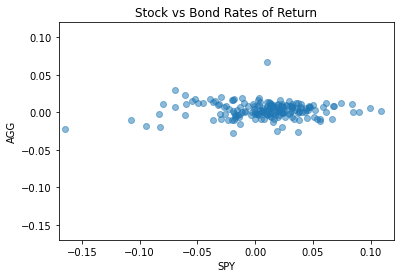

In [6]:
pp.scatter(noDates['X'], noDates['Y'], alpha = .5)
ax = pp.gca()
ax.set_xlim([-.17, .12])
ax.set_ylim([-.17, .12])
pp.title('Stock vs Bond Rates of Return')
pp.xlabel('SPY')
pp.ylabel('AGG')
pp.show()

There doesn't seem to bee too much correlation as there seems to be little change in AGG as SPY increases, and vice versa.

#### f.)

<Figure size 432x288 with 0 Axes>

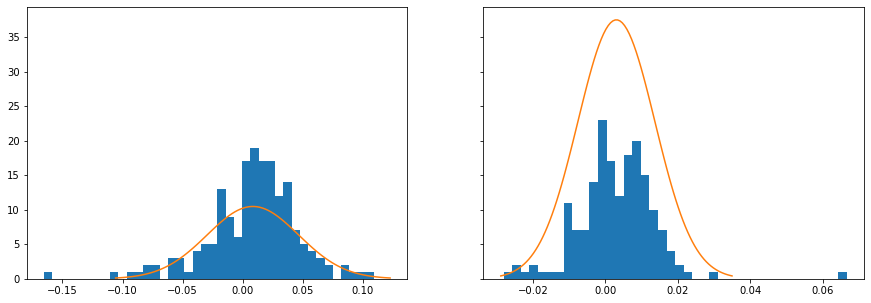

In [7]:
fig = pp.figure()

fig, (ax1, ax2) = pp.subplots(1, 2, figsize=[15, 5], sharey=True)

# pp.subplot(1, 2, 1)
ax1.hist(noDates['X'], 40)
# pp.title('SPY Frequencies')
line = np.linspace(xMean - (3*xSTD), xMean + (3*xSTD), 100)
ax1.plot(line, stats.norm.pdf(line, xMean, xSTD))

# pp.subplot(1, 2, 2)
ax2.hist(noDates['Y'], 40)
# pp.title('AGG Frequencies')
line = np.linspace(yMean - (3*ySTD), yMean + (3*ySTD), 100)
ax2.plot(line, stats.norm.pdf(line, yMean, ySTD))

pp.show()

SPY has a higher expected return rate, whereas AGG has a higher expected standard deviation

## 2.

In [8]:
xCoeff = 0.6
yCoeff = 0.4

def linComb(x, y):
    return (xCoeff * x) + (yCoeff * y)

print(f"Expected Value: {round(linComb(xMean, yMean), REG_ROUND)}")
combSTD = math.sqrt(((xCoeff ** 2) * xVar) + ((yCoeff ** 2) * yVar))
print(f'Combined Standard Deviation: {round(combSTD, SPEC_ROUND)}')

Expected Value: 0.0062
Combined Standard Deviation: 0.023226


## 3.

In [9]:
def func(x):
    return sp.comb(3, x) * ((1/4)**x) * ((3/4)**(3-x))

acc = 0
for i in range(4):
    acc += func(i) * i
print(f"The mean is: {round(acc, REG_ROUND)}")

The mean is: 0.75


## 4.

In [10]:
table = np.array([[0.1, 0.15], [0.2, 0.3], [0.1, 0.15]])

xVals = [2, 4]
yVals = [1, 3, 5]

xSums = [xVals[i] * sum(table[:,i]) for i in range(0, 2)]
ySums = [yVals[i] * sum(table[i]) for i in range(0, 3)]
xMean = sum(xSums)
yMean = sum(ySums)

print(f"Mean of X: {xMean}")
print(f"Mean of Y: {yMean}")

Mean of X: 3.2
Mean of Y: 3.0


## 5.

Mean of X: 0.88
Mean of X^2: 1.62


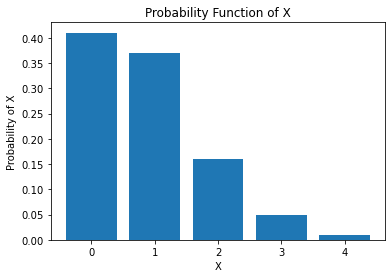

In [11]:
fXVals = np.array([.41, .37, .16, .05, .01])

mean = sum([i * fXVals[i] for i in range(5)])
meanSq = sum([(i**2) * fXVals[i] for i in range(5)])

pp.bar(np.arange(0,5), fXVals)
pp.title("Probability Function of X")
pp.xlabel("X")
pp.ylabel("Probability of X")

print(f"Mean of X: {round(mean, REG_ROUND)}")
print(f"Mean of X^2: {round(meanSq, REG_ROUND)}")

## 6.

In [12]:
xVar = 5
yVar = 3
combVar = (abs(-2 ** 2) * xVar) + ((4 ** 2) * yVar) - 3 
print(f"The combined variance is: {round(combVar, SPEC_ROUND)}")

The combined variance is: 65


## 7.

LaTeX finding xPDF and yPDF, y variance will be a number, but x variance will be infinite

## 8.

In [13]:
SEVEN_PROB = 1/6
NUM_ROLLS = 180

def binomProb(n, k, p):
    return sp.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

allProbs = [binomProb(NUM_ROLLS, i, SEVEN_PROB) for i in range(181)]

print(f'Probability of 7 occurring at least 25 times: {round(sum(allProbs[25:]), REG_ROUND)}')
print(f'Probability of 7 occurring between 33 and 41 times (inclusive): {round(sum(allProbs[33:42]), REG_ROUND)}')
print(f'Probability of 7 occurring exactly 30 times: {round(allProbs[30], REG_ROUND)}')

Probability of 7 occurring at least 25 times: 0.8656
Probability of 7 occurring between 33 and 41 times (inclusive): 0.2895
Probability of 7 occurring exactly 30 times: 0.0796


## 9.

LaTeX here:
**1.** $$
2.
3.
4.

Probabilities for p = 0.3: [0.0007979226629761189, 0.006839337111223878, 0.02784587252426864, 0.07160367220526222, 0.13042097437387049, 0.17886305056987956, 0.19163898275344238, 0.16426198521723634, 0.114396739704861, 0.06536956554563488, 0.03081708090008501, 0.012006654896137019, 0.0038592819309011843, 0.0010178325971607518, 0.0002181069851058754, 3.7389768875292926e-05, 5.007558331512446e-06, 5.049638653625995e-07, 3.606884752589997e-08, 1.6271660537999987e-09, 3.4867844009999975e-11]


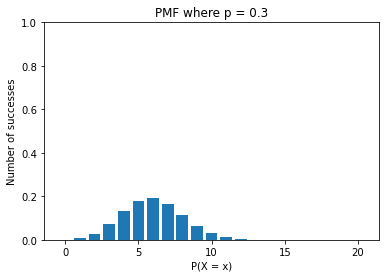

Expected Value (when p = 0.3): 6.0
Variance (when p = 0.3): 4.2


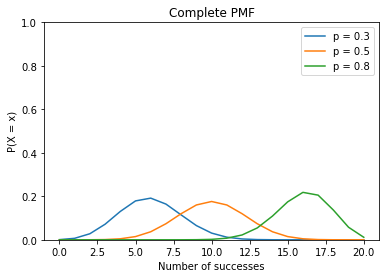

In [14]:
# a
def getProbs(n, p):
    cum = []
    reg = []
    cumSum = 0
    for i in range(n + 1):
        reg.append(binomProb(n, i, p))
        cumSum += binomProb(n, i, p)
        cum.append(cumSum)
    return reg, cum

n = 20
p = (0.3, 0.5, 0.8)

firstProbs = getProbs(n, p[0])
print(f'Probabilities for p = 0.3: {firstProbs[0]}')

secondProbs = getProbs(n, p[1])
thirdProbs = getProbs(n, p[2])

pp.bar(np.arange(0, n + 1), firstProbs[0])
pp.title("PMF where p = 0.3")
pp.xlabel("P(X = x)")
pp.ylabel("Number of successes")
pp.ylim(0, 1)
pp.show()

# compute expected value and standard deviation
print(f'Expected Value (when p = 0.3): {round(n * p[0], REG_ROUND)}')
print(f'Variance (when p = 0.3): {round(n * p[0] * (1-p[0]), SPEC_ROUND)}')

xVals = np.arange(0, n + 1)
pp.plot(xVals, firstProbs[0], label='p = 0.3')
pp.plot(xVals, secondProbs[0], label='p = 0.5')
pp.plot(xVals, thirdProbs[0], label='p = 0.8')
pp.title('Complete PMF')
pp.ylabel('P(X = x)')
pp.xlabel('Number of successes')
pp.ylim(0, 1)
pp.legend()
pp.show()

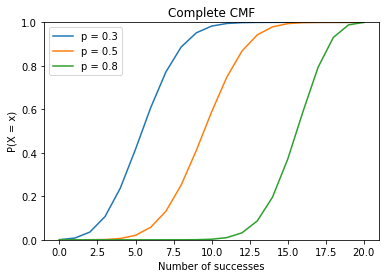

In [15]:
pp.plot(xVals, firstProbs[1], label='p = 0.3')
pp.plot(xVals, secondProbs[1], label='p = 0.5')
pp.plot(xVals, thirdProbs[1], label='p = 0.8')
pp.ylim(0, 1)
pp.title('Complete CMF')
pp.ylabel('P(X = x)')
pp.xlabel('Number of successes')
pp.legend()
pp.show()

**f.** As p increases, the graph shifts to the right. As p decreases, the graph shifts left.

**h.** As p increases, the graph shifts to the right. As p drecreases, the graph shifts left.

## 10.

LaTeX here

Probabilities for p = 0.2: [0.2, 0.16000000000000003, 0.12800000000000003, 0.10240000000000003, 0.08192000000000002, 0.06553600000000002, 0.052428800000000025, 0.041943040000000015, 0.033554432000000016, 0.026843545600000015, 0.021474836480000013, 0.01717986918400001, 0.013743895347200009, 0.010995116277760009, 0.008796093022208008, 0.007036874417766407, 0.005629499534213125, 0.004503599627370501, 0.0036028797018964006, 0.0028823037615171208]


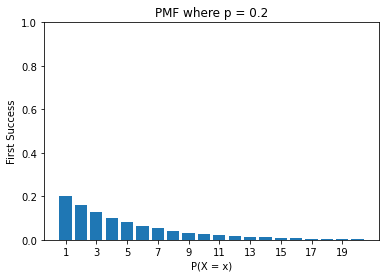

Expected Value (when p = 0.2): 5.0
Variance (when p = 0.2): 20.0


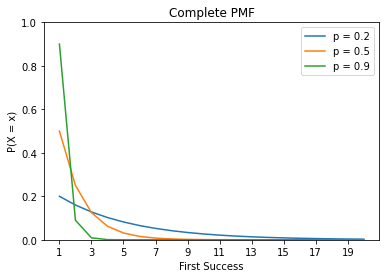

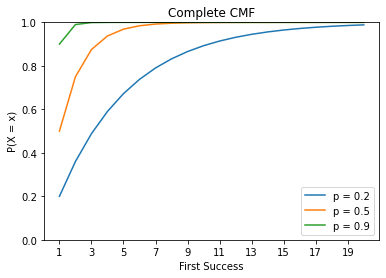

In [16]:
p = (0.2, 0.5, 0.9)
# arbitrarily chosen
n = 20

def geometric(n, p):
    cum = []
    reg = []
    cumSum = 0
    for i in range(1, n + 1):
        currP = p * ((1 - p) ** (i - 1))
        reg.append(currP)
        cumSum += currP
        cum.append(cumSum)
    return reg, cum

firstProbs = geometric(n, p[0])
print(f'Probabilities for p = 0.2: {firstProbs[0]}')

secondProbs = geometric(n, p[1])
thirdProbs = geometric(n, p[2])

pp.bar(np.arange(1, n + 1), firstProbs[0])
pp.title("PMF where p = 0.2")
pp.xlabel("P(X = x)")
pp.ylabel("First Success")
pp.ylim(0, 1)
pp.xticks(np.arange(1, n + 1, step=2))
pp.show()

# compute expected value and standard deviation
print(f'Expected Value (when p = 0.2): {round(1 / p[0], REG_ROUND)}')
print(f'Variance (when p = 0.2): {round((1 - p[0]) / (p[0] ** 2), SPEC_ROUND)}')

xVals = np.arange(1, n + 1)
pp.plot(xVals, firstProbs[0], label='p = 0.2')
pp.plot(xVals, secondProbs[0], label='p = 0.5')
pp.plot(xVals, thirdProbs[0], label='p = 0.9')
pp.title('Complete PMF')
pp.ylabel('P(X = x)')
pp.xlabel('First Success')
pp.ylim(0, 1)
pp.xticks(np.arange(1, n + 1, step=2))
pp.legend()
pp.show()

pp.plot(xVals, firstProbs[1], label='p = 0.2')
pp.plot(xVals, secondProbs[1], label='p = 0.5')
pp.plot(xVals, thirdProbs[1], label='p = 0.9')
pp.ylim(0, 1)
pp.title('Complete CMF')
pp.ylabel('P(X = x)')
pp.xlabel('First Success')
pp.xticks(np.arange(1, n + 1, step=2))
pp.legend()
pp.show()

**f.** As p increases, the graph pinches in towards the origin, and becomes more extreme with it's probability dropoff as x increases. As p decreases, the graph bows out, and the probability dropoff as x increases becomes less extreme

**h.** As p increases, the graph pinches upwards and to the left, and becomes more extreme with it's incremental gain in the beginning x values, and slopes off more quickly as x increases. As p decreases, the graph bowes outword from the top left and the incremental gain in the beginning x values is less, and slopes off more gradually as x increases.

## 11.

LaTeX here

Probabilities for λ = 2: [0.1353352832366127, 0.2706705664732254, 0.2706705664732254, 0.1804470443154836, 0.0902235221577418, 0.03608940886309672, 0.012029802954365574, 0.0034370865583901638, 0.0008592716395975409, 0.00019094925324389798, 3.8189850648779595e-05, 6.943609208869018e-06, 1.1572682014781697e-06, 1.7804126176587226e-07, 2.5434465966553178e-08, 3.391262128873757e-09, 4.2390776610921964e-10, 4.987150189520231e-11, 5.541277988355812e-12, 5.832924198269276e-13, 5.832924198269276e-14]


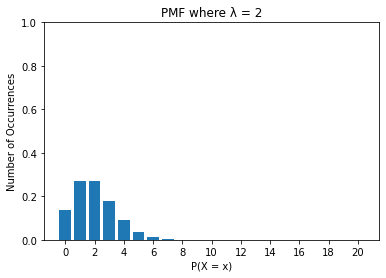

Expected Value (when p = 2): 2
Variance (when p = 2): 2


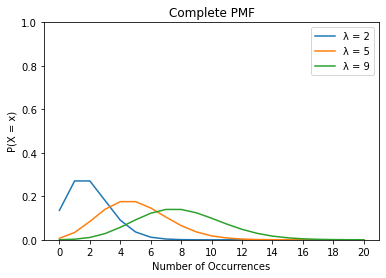

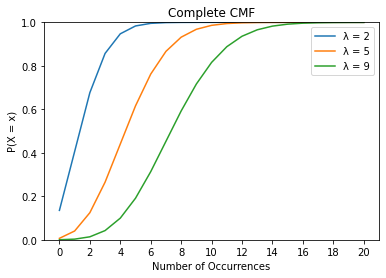

In [17]:
p = (2, 5, 8)
# arbitrarily chosen
n = 20

def poisson(n, p):
    cum = []
    reg = []
    cumSum = 0
    for i in range(n + 1):
        currP = ((p ** i) * (math.e ** -p)) / math.factorial(i)
        reg.append(currP)
        cumSum += currP
        cum.append(cumSum)
    return reg, cum

firstProbs = poisson(n, p[0])
print(f'Probabilities for λ = 2: {firstProbs[0]}')

secondProbs = poisson(n, p[1])
thirdProbs = poisson(n, p[2])

pp.bar(np.arange(0, n + 1), firstProbs[0])
pp.title("PMF where λ = 2")
pp.xlabel("P(X = x)")
pp.ylabel("Number of Occurrences")
pp.ylim(0, 1)
pp.xticks(np.arange(0, n + 1, step=2))
pp.show()

# compute expected value and standard deviation
print(f'Expected Value (when p = 2): {p[0]}')
print(f'Variance (when p = 2): {p[0]}')

xVals = np.arange(0, n + 1)
pp.plot(xVals, firstProbs[0], label='λ = 2')
pp.plot(xVals, secondProbs[0], label='λ = 5')
pp.plot(xVals, thirdProbs[0], label='λ = 9')
pp.title('Complete PMF')
pp.ylabel('P(X = x)')
pp.xlabel('Number of Occurrences')
pp.ylim(0, 1)
pp.xticks(np.arange(0, n + 1, step=2))
pp.legend()
pp.show()

pp.plot(xVals, firstProbs[1], label='λ = 2')
pp.plot(xVals, secondProbs[1], label='λ = 5')
pp.plot(xVals, thirdProbs[1], label='λ = 9')
pp.ylim(0, 1)
pp.title('Complete CMF')
pp.ylabel('P(X = x)')
pp.xlabel('Number of Occurrences')
pp.xticks(np.arange(0, n + 1, step=2))
pp.legend()
pp.show()

**f.** As λ increases, the graph becomes more stretched and spread out across the x values. As λ decreases, the graph becomes more condensed and smooshed, not spreading as far across the x values, making higher peaks and quicker drops.

**h.** as λ increases the graph rises slower and levels off slower. As λ decreases, the graph rises quicker and levels off quicker.